# Exercise 1

The **aims** of this exercise are:

- Allow you to practise slicing and analysing data with Pandas
- Introduce you to the MovieLens dataset
- Demonstrate use of Pandas to perform non-personalised and personalised recommendations

This exercise is worth 5% of the contribution to your final mark for RecSys, and is expected to take approximately 5-7 hours of your time.

**NB:** This is an individual exercise.

In [1]:
# Import modules.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Part A. MovieLens Exploration using Pandas

This exercise will use the [Movielens](https://grouplens.org/datasets/movielens/) data. There is a large dataset with 25M ratings, however we will focus on the smallest one, that has only 100k ratings.  

**Hint** : If you are using Colab, it might be good if you open these files, either on your own machine, or using Colab's inbuilt CSV viewer (via folder icon on the left hand sidebar). The CSV files are small enough to be searched using your favourite editor.

In [2]:
!curl -o ml-latest-small.zip http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
# !curl -o ml-latest-small.zip http://www.dcs.gla.ac.uk/~craigm/recsysHM/ml-latest-small.zip  # Backup location. Use it instead of the previous line if necessary.
!unzip -o ml-latest-small.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  955k  100  955k    0     0  1641k      0 --:--:-- --:--:-- --:--:-- 1641k
Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


Let's look into the files using Pandas.

In [3]:
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
movies_df = pd.read_csv('ml-latest-small/movies.csv')

# Treat userId as strings, and similarly as movies. This will prevent confusion later on.
ratings_df['userId'] = 'u' + ratings_df['userId'].astype(str)
ratings_df['movieId'] = 'm' + ratings_df['movieId'].astype(str)
movies_df['movieId'] = 'm' +  movies_df['movieId'].astype(str)

In [4]:
ratings_df

,userId,movieId,rating,timestamp
0,u1,m1,4.0,964982703
1,u1,m3,4.0,964981247
2,u1,m6,4.0,964982224
3,u1,m47,5.0,964983815
4,u1,m50,5.0,964982931
...,...,...,...,...
100831,u610,m166534,4.0,1493848402
100832,u610,m168248,5.0,1493850091
100833,u610,m168250,5.0,1494273047
100834,u610,m168252,5.0,1493846352


`ratings_df` is a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Viewing it, we can see users (identified by userId) are rating various movies (cf. movieId).

We can slice and dice the dataframes.

- Project a single column (this returns a [Pandas Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)).

In [5]:
movies_df['title']

0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object

- Project multiple columns (this returns a view of the original DataFrame, as another DataFrame object).

In [6]:
movies_df[['movieId', 'title']]

,movieId,title
0,m1,Toy Story (1995)
1,m2,Jumanji (1995)
2,m3,Grumpier Old Men (1995)
3,m4,Waiting to Exhale (1995)
4,m5,Father of the Bride Part II (1995)
...,...,...
9737,m193581,Black Butler: Book of the Atlantic (2017)
9738,m193583,No Game No Life: Zero (2017)
9739,m193585,Flint (2017)
9740,m193587,Bungo Stray Dogs: Dead Apple (2018)


- Select rows based on one or more conditions.

In [7]:
ratings_df[(ratings_df['userId'] == 'u500') & (ratings_df['rating'] == 1)]

,userId,movieId,rating,timestamp
79908,u500,m11,1.0,1005528017
79909,u500,m39,1.0,1005527926
79910,u500,m101,1.0,1005527980
79915,u500,m231,1.0,1005528039
79923,u500,m449,1.0,1005528017
79924,u500,m471,1.0,1005528017
79926,u500,m539,1.0,1005527980
79931,u500,m597,1.0,1005527980
79934,u500,m745,1.0,1005528205
79939,u500,m1188,1.0,1005528065


Let's practice a bit more with Pandas. You can also refer to the [Pandas Dataframe API documentation.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

Write code to answer the following questions.

## Task 1. How many users are there in this dataset?

In [8]:
ratings_df['userId'].unique().size  # Count the unique users.

610

## Task 2. What is the average rating of *each user*?

The output should be a Pandas Series containing an average rating for each of the users.

**Hint:** Use a [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) on the `ratings_df` dataframe (e.g., `ratings_df.groupby(['userId']).mean()['rating']`). [Aggregation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation) will also be useful.

In [9]:
mean_user_ratings = ratings_df.groupby(['userId'])['rating'].mean()  # Group ratings by user, and then compute the mean of each user on the rating attribute of the grouped data.
mean_user_ratings

userId
u1      4.366379
u10     3.278571
u100    3.945946
u101    3.557377
u102    3.357143
          ...   
u95     4.062500
u96     3.884615
u97     4.194444
u98     3.913043
u99     3.867925
Name: rating, Length: 610, dtype: float64

What are the average ratings of `userId` u10 and u200 (rounded to 2 decimal places)?

In [10]:
print('u10:', round(mean_user_ratings.loc['u10'], 2))
print('u200:', round(mean_user_ratings.loc['u200'], 2))

u10: 3.28
u200: 3.81


## Task 3. What is the average number of ratings per-user? 

In contrast to Task 2, the solution is a single number (rounded to 2 decimal places).

Many solutions will involve [groupby.count()](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation).

In [11]:
print('{:.2f}'.format(ratings_df.groupby(['userId'])['rating'].count().mean()))

165.30


## Analysing users's preferences

Let's try something else. We can see what movies a given user has rated by "merging" the two dataframes - this equates to a JOIN in SQL. Lets do this for `userId` u556.

In [12]:
pd.merge(
    ratings_df[ratings_df['userId'] == 'u556'],
    movies_df,
    on = ['movieId']
).sort_values(by = 'rating', ascending = False)

,userId,movieId,rating,timestamp,title,genres
0,u556,m588,5.0,1534321062,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
2,u556,m4896,5.0,1534320962,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy
27,u556,m112852,5.0,1534321287,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi
21,u556,m76093,5.0,1534320965,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX
3,u556,m4993,4.5,1534320935,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
4,u556,m5816,4.5,1534320982,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy
23,u556,m88125,4.5,1534320986,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
13,u556,m49649,4.5,1534321075,Eragon (2006),Action|Adventure|Fantasy
18,u556,m72998,4.0,1534321171,Avatar (2009),Action|Adventure|Sci-Fi|IMAX
30,u556,m162600,4.0,1534321200,Miss Peregrine's Home for Peculiar Children (2...,Fantasy


This user is pretty into adventure/fantasies. 

**NB:** If the columns we are joining on don't have the same name, we can specify `left_on` and `right_on` attributes. See also the [pd.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) documentation.

## Task 4. Analysing movie categories

Lets examine two particular users a bit more, u556 and u7.

**Hints:**
- Pandas Series has a useful [`str.contains()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html) function.
- Pandas dataframes respond to `len()` as you would expect.

**Question 1.** How many movies with "Fantasy" genre have u556 and u7 rated positively ($\geq 4$)?

In [13]:
fantasy_u556 = pd.merge(
    ratings_df[(ratings_df['userId'] == 'u556') & (ratings_df['rating'] >= 4)],
    movies_df[movies_df['genres'].str.contains('Fantasy', regex = False)],
    on = ['movieId']
)  # Merge into a data frame containing what movies with "Fantasy" genre u556 has rated positively.

fantasy_u7 = pd.merge(
    ratings_df[(ratings_df['userId'] == 'u7') & (ratings_df['rating'] >= 4)],
    movies_df[movies_df['genres'].str.contains('Fantasy', regex = False)],
    on = ['movieId']
)  # Merge into a data frame containing what movies with "Fantasy" genre u7 has rated positively.

n_fantasy_u556 = len(fantasy_u556)
print('u556:', n_fantasy_u556)
print('u7:', len(fantasy_u7))

u556: 22
u7: 11


**Question 2.** What percentage of ALL of u556's ratings are positive ratings ($\geq 4$)  AND for movies belonging to the "Fantasy" genre (a decimal between 0 and 1, rounded to 2 decimal places)?

In [14]:
round(n_fantasy_u556 / len(ratings_df[ratings_df['userId'] == 'u556']), 2)

0.69

# Part B. Popularity-based Recomendation

Now let's examine the ratings of movies. 

We can get a dataframe containing the number of times a movie has been rated by applying a `groupby()` and aggregation of the `ratings_df`.

In [15]:
grouping_count_series = ratings_df.groupby(['movieId'])['rating'].count().rename('n_rating').sort_values(ascending = False).reset_index()
grouping_count_series

,movieId,n_rating
0,m356,329
1,m318,317
2,m296,307
3,m593,279
4,m2571,278
...,...,...
9719,m3403,1
9720,m34018,1
9721,m3400,1
9722,m33966,1


## Task 5. Plotting the distribution of movie ratings

Use Matplotlib's histogram function to plot the distribution of movie ratings from the `grouping_count_series` dataframe. This will produce a bar chart with 'binned' counts.

**Hints:**

- Apply a logarithmic scale for the y-axis, using matplotlib's `log = True` option.
- Allow matplotlib to use its default number of bins (which is 10).
- Matplotlib has a [`savefig()`](https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/#the-savefig-method) function for saving a PNG of a figure.

You will need to analyse this graph in the quiz.

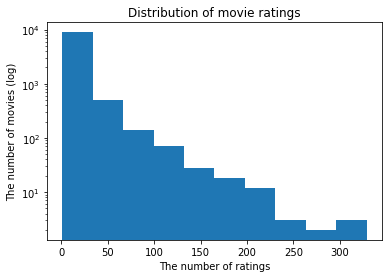

In [16]:
plt.hist(grouping_count_series['n_rating'], log = True)
plt.title('Distribution of movie ratings')
plt.xlabel('The number of ratings')
plt.ylabel('The number of movies (log)')
# plt.savefig('task5.png')
plt.show()

## Task 6. Finding the names of *all* of the movies that have the highest *average* ratings

You should return a dataframe containing the IDs and names of the movies, their average ratings, and the number of ratings.

**NB:** You may need to analyse this dataframe further to answer the questions in the quiz.

**Hints:**

- Try a [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). Once you have a Series with columns [`movieId`, `meanRating`], identify the highest value of `meanRating`. You can then merge this with the `movies_df`.
- If the column we are trying to merge on is an index, we can use  `left_index = True` or `right_index = True` in the [pd.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html).

In [17]:
mean_movie_ratings = ratings_df.groupby(['movieId'])['rating'].mean().rename('mean_rating')  # Get a Series containing mean movie ratings.

# First, merge into a dataframe containing corresponding mean ratings and the number of ratings.
# Then, merge into a dataframe to include corresponding titles and genres.
movie_ratings = pd.merge(
    mean_movie_ratings[mean_movie_ratings == mean_movie_ratings.max()],  # Keep the highest mean ratings.
    grouping_count_series,
    on = ['movieId']
).merge(
    movies_df,
    on = ['movieId'],
    right_index = True
)

movie_ratings

,movieId,mean_rating,n_rating,title,genres
0,m100556,5.0,1,"Act of Killing, The (2012)",Documentary
1,m100906,5.0,1,Maniac Cop 2 (1990),Action|Horror|Thriller
2,m102084,5.0,1,Justice League: Doom (2012),Action|Animation|Fantasy
3,m102217,5.0,1,Bill Hicks: Revelations (1993),Comedy
4,m103602,5.0,1,Craig Ferguson: I'm Here To Help (2013),Comedy|Documentary
...,...,...,...,...,...
291,m96608,5.0,1,Runaway Brain (1995),Animation|Comedy|Sci-Fi
292,m96832,5.0,1,Holy Motors (2012),Drama|Fantasy|Musical|Mystery|Sci-Fi
293,m96935,5.0,1,My Left Eye Sees Ghosts (Ngo joh aan gin diy g...,Comedy|Fantasy|Romance
294,m99,5.0,2,Heidi Fleiss: Hollywood Madam (1995),Documentary


How many users have rated the movie with `movieId` m6442?

In [18]:
movie_ratings[movie_ratings['movieId'] == 'm6442']

,movieId,mean_rating,n_rating,title,genres
236,m6442,5.0,2,Belle époque (1992),Comedy|Romance


# Part C - Association Rules and Lift

I think we can do better than simply examining movie popularity. Let's take all of the positive ratings (4 or 5), and find the most popular pairs of movies that users have watched. There is a lot going on there, so please take the time to break it down to understand what it does.

**NB:** In this code, we perform a "self-join" on a dataframe. If this is unfamiliar, you can read more at:

 - https://dfrieds.com/data-analysis/self-join-python-pandas.html
 - https://www.w3schools.com/sql/sql_join_self.asp

In [19]:
positives = ratings_df[ratings_df['rating'] >= 4]
pairs = pd.merge(positives, positives, on = ['userId'])  # Join positives with itself on userId to get all pairs of movies watched by a given user.
sequences = pairs[pairs['timestamp_x'] < pairs['timestamp_y']]  # We only want x->y, but not y->x. Use the timestamps to restrict the selected pairs.
pair_counts = sequences.groupby(['movieId_x', 'movieId_y'])['userId'].count().rename('pair_count')  # Count the frequency of each movie pairs.
pairs_with_counts = pair_counts.reset_index().sort_values(['pair_count'], ascending = False)  # Sort by the most popular pairs.
pairs_with_counts

,movieId_x,movieId_y,pair_count
1574483,m318,m356,104
1416644,m296,m593,92
1416033,m296,m47,91
1187221,m260,m1196,91
1575263,m318,m527,90
...,...,...,...
1358088,m288,m302,1
1358089,m288,m3020,1
1358091,m288,m3030,1
1358092,m288,m3033,1


## Task 7. Displaying the titles of the (most popular) movie pairs

You will need to analyse this dataframe to complete questions in the quiz.

**Hint:** You will need to re-sort after a pd.merge().

In [20]:
# First, merge into a dataframe containing corresponding movie titles and genres for x.
# Then, merge into a dataframe to include corresponding movie titles and genres for y.
pairs_metadata = pd.merge(
    pairs_with_counts,
    movies_df.add_suffix('_x'),
    how = 'left',  # Preserve the descending order by the number of pairs.
    on = ['movieId_x']
).merge(
    movies_df.add_suffix('_y'),
    how = 'left',
    on = ['movieId_y']
)

pairs_metadata

,movieId_x,movieId_y,pair_count,title_x,genres_x,title_y,genres_y
0,m318,m356,104,"Shawshank Redemption, The (1994)",Crime|Drama,Forrest Gump (1994),Comedy|Drama|Romance|War
1,m296,m593,92,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2,m296,m47,91,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
3,m260,m1196,91,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
4,m318,m527,90,"Shawshank Redemption, The (1994)",Crime|Drama,Schindler's List (1993),Drama|War
...,...,...,...,...,...,...,...
3533031,m288,m302,1,Natural Born Killers (1994),Action|Crime|Thriller,"Queen Margot (Reine Margot, La) (1994)",Drama|Romance
3533032,m288,m3020,1,Natural Born Killers (1994),Action|Crime|Thriller,Falling Down (1993),Action|Drama
3533033,m288,m3030,1,Natural Born Killers (1994),Action|Crime|Thriller,Yojimbo (1961),Action|Adventure
3533034,m288,m3033,1,Natural Born Killers (1994),Action|Crime|Thriller,Spaceballs (1987),Comedy|Sci-Fi


What is the `movieId_x` of the movie pair with pair count frequency 74?

In [21]:
pairs_metadata[pairs_metadata['pair_count'] == 74]

,movieId_x,movieId_y,pair_count,title_x,genres_x,title_y,genres_y
17,m858,m1221,74,"Godfather, The (1972)",Crime|Drama,"Godfather: Part II, The (1974)",Crime|Drama


## Task 8. Calculating Lift (see Lecture 3) for all pairs

Your target dataframe should have columns: 
- `movieId_x` and `movieId_y`
- `pair_count` - count of movies x & y occurring in a profile	
- `n_count_x` and `n_count_y` - how many times these movies appeared in total.
- `lift`	- your calculated lift for x->y.
- `title_x`, `title_y`, `genres_x`, and `genres_y` - metadata about the films, so you know if you have success. 

**Hints:**

- You will need to join top pairs with a dataframe containing rating counts of individual movies. A calculated column will be needed. See https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html or https://stackoverflow.com/a/12377083/9989050 for hints on how to achieve that.
- The example solution has duplicated columns using this trick https://stackoverflow.com/a/40435354/9989050 to get rid of them.
- It might be useful to [sort](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) your dataframe.

In [22]:
positives_count = positives.groupby(['movieId'])['rating'].count().rename('n_rating').reset_index()  # A dataframe containing the number of positive ratings for each movie

# First, merge into a dataframe containing the corresponding number of positive ratings for x.
# Then, merge into a dataframe to include the corresponding number of positive ratings for y.
pairs_info = pd.merge(
    pairs_metadata,
    positives_count.add_suffix('_x'),
    on = ['movieId_x']
).merge(
    positives_count.add_suffix('_y'),
    on = ['movieId_y']
)

pairs_info['lift'] = pairs_info['pair_count'] * len(positives) / (pairs_info['n_rating_x'] * pairs_info['n_rating_y'])  # Lift = Support{x, y} / (Support{x} * Support{y}) = ... = pair_count * n_positive_ratings / (n_rating_x * n_rating_y)
pairs_info.sort_values('lift', ascending = False, inplace = True)  # Sort by the highest lifts.
pairs_info

,movieId_x,movieId_y,pair_count,title_x,genres_x,title_y,genres_y,n_rating_x,n_rating_y,lift
3533035,m130490,m114265,1,Insurgent (2015),Action|Sci-Fi|Thriller,Laggies (2014),Comedy|Romance,1,1,48580.000000
2977681,m97168,m148424,1,Marley (2012),Documentary,Chi-Raq (2015),Comedy|Drama,1,1,48580.000000
2977683,m42176,m148424,1,"Ear, The (Ucho) (1970)",Drama|Thriller,Chi-Raq (2015),Comedy|Drama,1,1,48580.000000
2977684,m97860,m148424,1,Killing Them Softly (2012),Crime|Drama|Thriller,Chi-Raq (2015),Comedy|Drama,1,1,48580.000000
2977685,m97904,m148424,1,Smashed (2012),Comedy|Drama,Chi-Raq (2015),Comedy|Drama,1,1,48580.000000
...,...,...,...,...,...,...,...,...,...,...
10931,m329,m296,1,Star Trek: Generations (1994),Adventure|Drama|Sci-Fi,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,42,244,4.740437
1189641,m2959,m349,1,Fight Club (1999),Action|Crime|Drama|Thriller,Clear and Present Danger (1994),Action|Crime|Drama|Thriller,179,58,4.679253
3114755,m80463,m318,1,"Social Network, The (2010)",Drama,"Shawshank Redemption, The (1994)",Crime|Drama,38,274,4.665770
15624,m454,m2571,1,"Firm, The (1993)",Drama|Thriller,"Matrix, The (1999)",Action|Sci-Fi|Thriller,48,222,4.558934


If your solution is correct, you will see the highest lift movie pairs. 
Let's check them - do the highest lift movies pairs make sense? e.g. "Pink Panther, The (2006)" (Adventure|Comedy|Crime) with	"For Richer or Poorer (1997)" (Comedy). 

It should be clear that these lift pairs do not have high support.

In [23]:
pairs_info[pairs_info['title_x'] == 'Pink Panther, The (2006)'].head(1)

,movieId_x,movieId_y,pair_count,title_x,genres_x,title_y,genres_y,n_rating_x,n_rating_y,lift
3533020,m43836,m1703,1,"Pink Panther, The (2006)",Adventure|Comedy|Crime,For Richer or Poorer (1997),Comedy,1,1,48580.0


What is the lift of the pair `movieId_x` = m1475, `movieId_y` = m2024?

In [24]:
pairs_info[(pairs_info['movieId_x'] == 'm1475') & (pairs_info['movieId_y'] == 'm2024')]

,movieId_x,movieId_y,pair_count,title_x,genres_x,title_y,genres_y,n_rating_x,n_rating_y,lift
3197677,m1475,m2024,1,Kama Sutra: A Tale of Love (1996),Romance,"Rapture, The (1991)",Drama|Mystery,1,1,48580.0


What is the lift of the pair `movieId_x` = m91500, `movieId_y` = m106487?

In [25]:
pairs_info[(pairs_info['movieId_x'] == 'm91500') & (pairs_info['movieId_y'] == 'm106487')]

,movieId_x,movieId_y,pair_count,title_x,genres_x,title_y,genres_y,n_rating_x,n_rating_y,lift
1066027,m91500,m106487,10,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,The Hunger Games: Catching Fire (2013),Action|Adventure|Sci-Fi|IMAX,24,14,1445.833333


## Task 9 - Support Thresholds

Removing movie pairs with support count $< 10$.

If you solution is correct, you will get the "The Hunger Games (2012)" paired with "The Hunger Games: Mockingjay - Part 1 (2014)" as the movie pair with the highest lift. This seems a good pairing! 

So in essence, we can use lift to identify highly co-occurring movie pairs without resorting to any collaborative notions.

Keep this dataframe around - you will need it to answer the questions for Task 9 in the quiz.

In [26]:
kept_pairs_info = pairs_info[pairs_info['pair_count'] >= 10]
kept_pairs_info

,movieId_x,movieId_y,pair_count,title_x,genres_x,title_y,genres_y,n_rating_x,n_rating_y,lift
1081108,m91500,m116823,11,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,The Hunger Games: Mockingjay - Part 1 (2014),Adventure|Sci-Fi|Thriller,24,15,1484.388889
1066027,m91500,m106487,10,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,The Hunger Games: Catching Fire (2013),Action|Adventure|Sci-Fi|IMAX,24,14,1445.833333
595541,m115713,m139385,10,Ex Machina (2015),Drama|Sci-Fi|Thriller,The Revenant (2015),Adventure|Drama,20,19,1278.421053
768413,m91658,m67255,10,"Girl with the Dragon Tattoo, The (2011)",Drama|Thriller,"Girl with the Dragon Tattoo, The (Män som hata...",Crime|Drama|Mystery|Thriller,24,19,1065.350877
892673,m34162,m8807,10,Wedding Crashers (2005),Comedy|Romance,Harold and Kumar Go to White Castle (2004),Adventure|Comedy,25,19,1022.736842
...,...,...,...,...,...,...,...,...,...,...
15372,m457,m2571,13,"Fugitive, The (1993)",Thriller,"Matrix, The (1999)",Action|Sci-Fi|Thriller,137,222,20.764779
3114555,m1206,m318,10,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller,"Shawshank Redemption, The (1994)",Crime|Drama,86,274,20.616194
3114543,m364,m318,13,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,"Shawshank Redemption, The (1994)",Crime|Drama,115,274,20.042526
10758,m457,m296,13,"Fugitive, The (1993)",Thriller,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,137,244,18.892545


If a user watches m110, what `movieId` would you recommend they watch?

In [27]:
kept_pairs_info[kept_pairs_info['movieId_x'] == 'm110'].head(1)

,movieId_x,movieId_y,pair_count,title_x,genres_x,title_y,genres_y,n_rating_x,n_rating_y,lift
1260796,m110,m2403,12,Braveheart (1995),Action|Drama|War,First Blood (Rambo: First Blood) (1982),Action|Adventure|Drama|Thriller,166,14,250.843373


If the user watches m364, what is the Lift score associated with watching m362?

In [28]:
kept_pairs_info[(kept_pairs_info['movieId_x'] == 'm364') & (kept_pairs_info['movieId_y'] == 'm362')]

,movieId_x,movieId_y,pair_count,title_x,genres_x,title_y,genres_y,n_rating_x,n_rating_y,lift
962511,m364,m362,10,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,"Jungle Book, The (1994)",Adventure|Children|Romance,115,17,248.491049


# End of Exercise

As part of your submission, you should complete the Exercise 1 quiz on Moodle.
You will need to upload your notebook, complete with the **results** of executing the code.